In [38]:
# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='chesterish')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(grid=False)

# reset default matplotlib rcParams
#jtplot.reset()

In [39]:
##Load data set
#Congrats: You already set your working directory by openning this file

#Load pandas
import pandas as pd

#Import CSV & drop variables
df = pd.read_csv('results.csv', sep=',').drop(['city', 'country'], axis=1)
#.set_index('date')

#Remove a warning message
pd.options.mode.chained_assignment = None  # default='warn'

#Check first few rows
df.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,False
1,1873-03-08,England,Scotland,4,2,Friendly,False
2,1874-03-07,Scotland,England,2,1,Friendly,False
3,1875-03-06,England,Scotland,2,2,Friendly,False
4,1876-03-04,Scotland,England,3,0,Friendly,False


In [40]:
##Load data set
#Check variables
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
neutral         bool
dtype: object

In [41]:
##Load data set
#Check missings (NaN's)
df.isnull().sum(axis=0)

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
neutral       0
dtype: int64

In [42]:
##Load data set
#Subset data to only include Germany matches 
df_ger = df[(df['home_team'] == 'Germany') | (df['away_team'] == 'Germany')]

df_ger.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral
209,1908-04-05,Switzerland,Germany,5,3,Friendly,False
216,1908-06-07,Austria,Germany,3,2,Friendly,False
234,1909-04-04,Germany,Switzerland,1,0,Friendly,False
235,1909-04-04,Hungary,Germany,3,3,Friendly,False
253,1910-04-03,Switzerland,Germany,2,3,Friendly,False


In [43]:
##Load data set
#Simple recode (total column to be counted)
df_ger['match'] = 1

df_ger.tail()

,date,home_team,away_team,home_score,away_score,tournament,neutral,match
38817,2018-03-23,Germany,Spain,1,1,Friendly,False,1
38883,2018-03-27,Germany,Brazil,0,1,Friendly,False,1
38987,2018-06-02,Austria,Germany,2,1,Friendly,False,1
39030,2018-06-08,Germany,Saudi Arabia,2,1,Friendly,False,1
39059,2018-06-17,Germany,Mexico,0,1,FIFA World Cup,True,1


In [44]:
##Recodes and Data Manpulation
#Conditional recode (Define Goals Scored)
df_ger['goals'] = df_ger.loc[df_ger['home_team'] == 'Germany','home_score']
df_ger['goals'] = df_ger['goals'].fillna(df_ger.loc[df_ger['away_team'] == 'Germany','away_score'])

df_ger.tail()

,date,home_team,away_team,home_score,away_score,tournament,neutral,match,goals
38817,2018-03-23,Germany,Spain,1,1,Friendly,False,1,1.0
38883,2018-03-27,Germany,Brazil,0,1,Friendly,False,1,0.0
38987,2018-06-02,Austria,Germany,2,1,Friendly,False,1,1.0
39030,2018-06-08,Germany,Saudi Arabia,2,1,Friendly,False,1,2.0
39059,2018-06-17,Germany,Mexico,0,1,FIFA World Cup,True,1,0.0


In [45]:
##Recodes and Data Manpulation
#Conditional recode (Define Goals Conceded)
df_ger['conceded'] = df_ger.loc[df_ger['home_team'] == 'Germany','away_score']
df_ger['conceded'] = df_ger['conceded'].fillna(df_ger.loc[df_ger['away_team'] == 'Germany','home_score'])

df_ger.tail()

,date,home_team,away_team,home_score,away_score,tournament,neutral,match,goals,conceded
38817,2018-03-23,Germany,Spain,1,1,Friendly,False,1,1.0,1.0
38883,2018-03-27,Germany,Brazil,0,1,Friendly,False,1,0.0,1.0
38987,2018-06-02,Austria,Germany,2,1,Friendly,False,1,1.0,2.0
39030,2018-06-08,Germany,Saudi Arabia,2,1,Friendly,False,1,2.0,1.0
39059,2018-06-17,Germany,Mexico,0,1,FIFA World Cup,True,1,0.0,1.0


In [46]:
##Recodes and Data Manpulation
#Simple recode (Define Goal Differential)
df_ger['goaldiff'] = df_ger['goals'] - df_ger['conceded']

df_ger.tail()

,date,home_team,away_team,home_score,away_score,tournament,neutral,match,goals,conceded,goaldiff
38817,2018-03-23,Germany,Spain,1,1,Friendly,False,1,1.0,1.0,0.0
38883,2018-03-27,Germany,Brazil,0,1,Friendly,False,1,0.0,1.0,-1.0
38987,2018-06-02,Austria,Germany,2,1,Friendly,False,1,1.0,2.0,-1.0
39030,2018-06-08,Germany,Saudi Arabia,2,1,Friendly,False,1,2.0,1.0,1.0
39059,2018-06-17,Germany,Mexico,0,1,FIFA World Cup,True,1,0.0,1.0,-1.0


In [47]:
##Recodes and Data Manpulation
#Dummy recode (Define Friendly v Competitive match)
df_ger['friendly'] = df_ger['tournament'] == 'Friendly'

df_ger.tail()

,date,home_team,away_team,home_score,away_score,tournament,neutral,match,goals,conceded,goaldiff,friendly
38817,2018-03-23,Germany,Spain,1,1,Friendly,False,1,1.0,1.0,0.0,True
38883,2018-03-27,Germany,Brazil,0,1,Friendly,False,1,0.0,1.0,-1.0,True
38987,2018-06-02,Austria,Germany,2,1,Friendly,False,1,1.0,2.0,-1.0,True
39030,2018-06-08,Germany,Saudi Arabia,2,1,Friendly,False,1,2.0,1.0,1.0,True
39059,2018-06-17,Germany,Mexico,0,1,FIFA World Cup,True,1,0.0,1.0,-1.0,False


In [48]:
##Recodes and Data Manpulation
#Categorical recode (home vs away vs neutral matches)
df_ger.loc[df_ger['home_team'] == 'Germany','home'] = 'home'
df_ger.loc[df_ger['away_team'] == 'Germany','home'] = 'away'
df_ger.loc[df_ger['neutral'] == True,'home'] = 'neutral'

df_ger.tail()

,date,home_team,away_team,home_score,away_score,tournament,neutral,match,goals,conceded,goaldiff,friendly,home
38817,2018-03-23,Germany,Spain,1,1,Friendly,False,1,1.0,1.0,0.0,True,home
38883,2018-03-27,Germany,Brazil,0,1,Friendly,False,1,0.0,1.0,-1.0,True,home
38987,2018-06-02,Austria,Germany,2,1,Friendly,False,1,1.0,2.0,-1.0,True,away
39030,2018-06-08,Germany,Saudi Arabia,2,1,Friendly,False,1,2.0,1.0,1.0,True,home
39059,2018-06-17,Germany,Mexico,0,1,FIFA World Cup,True,1,0.0,1.0,-1.0,False,neutral


In [49]:
##Recodes and Data Manpulation
#Conditional recode (opponent)
df_ger['opponent'] = df_ger['home_team'].loc[(df_ger['home_team'] != 'Germany')] 
df_ger['opponent'] = df_ger['opponent'].fillna(df_ger['away_team'].loc[(df_ger['away_team'] != 'Germany')])

df_ger.tail()

,date,home_team,away_team,home_score,away_score,tournament,neutral,match,goals,conceded,goaldiff,friendly,home,opponent
38817,2018-03-23,Germany,Spain,1,1,Friendly,False,1,1.0,1.0,0.0,True,home,Spain
38883,2018-03-27,Germany,Brazil,0,1,Friendly,False,1,0.0,1.0,-1.0,True,home,Brazil
38987,2018-06-02,Austria,Germany,2,1,Friendly,False,1,1.0,2.0,-1.0,True,away,Austria
39030,2018-06-08,Germany,Saudi Arabia,2,1,Friendly,False,1,2.0,1.0,1.0,True,home,Saudi Arabia
39059,2018-06-17,Germany,Mexico,0,1,FIFA World Cup,True,1,0.0,1.0,-1.0,False,neutral,Mexico


In [50]:
##Recodes and Data Manpulation
#String variables (Define year)
df_ger['year'] = df_ger['date'].str[:4]

df_ger.tail()

,date,home_team,away_team,home_score,away_score,tournament,neutral,match,goals,conceded,goaldiff,friendly,home,opponent,year
38817,2018-03-23,Germany,Spain,1,1,Friendly,False,1,1.0,1.0,0.0,True,home,Spain,2018
38883,2018-03-27,Germany,Brazil,0,1,Friendly,False,1,0.0,1.0,-1.0,True,home,Brazil,2018
38987,2018-06-02,Austria,Germany,2,1,Friendly,False,1,1.0,2.0,-1.0,True,away,Austria,2018
39030,2018-06-08,Germany,Saudi Arabia,2,1,Friendly,False,1,2.0,1.0,1.0,True,home,Saudi Arabia,2018
39059,2018-06-17,Germany,Mexico,0,1,FIFA World Cup,True,1,0.0,1.0,-1.0,False,neutral,Mexico,2018


In [51]:
##Recodes and Data Manpulation
#Drop redundant variables
df_ger = df_ger.drop(['home_score','away_score','tournament','neutral','home_team','away_team'], axis=1)

df_ger.tail()

,date,match,goals,conceded,goaldiff,friendly,home,opponent,year
38817,2018-03-23,1,1.0,1.0,0.0,True,home,Spain,2018
38883,2018-03-27,1,0.0,1.0,-1.0,True,home,Brazil,2018
38987,2018-06-02,1,1.0,2.0,-1.0,True,away,Austria,2018
39030,2018-06-08,1,2.0,1.0,1.0,True,home,Saudi Arabia,2018
39059,2018-06-17,1,0.0,1.0,-1.0,False,neutral,Mexico,2018


In [52]:
##Descriptive Statistics
#Tabs
tabHome = pd.crosstab(df_ger['home'],df_ger['friendly'])
tabHome.columns=['competitive','friendly']

tabHome

,competitive,friendly
home,,
away,108,271
home,119,285
neutral,139,9


In [53]:
##Descriptive Statistics
#Unweighted proportions
propHome = round((tabHome/tabHome.sum(0))*100, ndigits = 2)

propHome

,competitive,friendly
home,,
away,29.51,47.96
home,32.51,50.44
neutral,37.98,1.59


In [54]:
##Descriptive Statistics
#Goal difference table
goaldiffTable = round(pd.pivot_table(df_ger, index=['home','friendly'], aggfunc='mean'), ndigits = 2)

goaldiffTable

conceded  goaldiff  goals  match
home    friendly                                  
away    False         0.81      1.54   2.34      1
        True          1.45      0.45   1.89      1
home    False         0.72      2.17   2.89      1
        True          1.16      1.26   2.42      1
neutral False         1.17      0.76   1.93      1
        True          1.67      0.22   1.89      1

In [55]:
##Descriptive Statistics
#Opponent table
threeOpponents = df_ger.loc[df_ger['opponent'].isin(['Mexico','Sweden','Korea Republic'])] 
opponentTable = round(pd.pivot_table(threeOpponents, index=['opponent'], values=['goaldiff','match'], aggfunc={'mean', 'sum'}), ndigits = 2)

opponentTable

goaldiff       match    
                   mean   sum  mean sum
opponent                               
Korea Republic     0.00   0.0     1   3
Mexico             1.08  13.0     1  12
Sweden             0.28  10.0     1  36

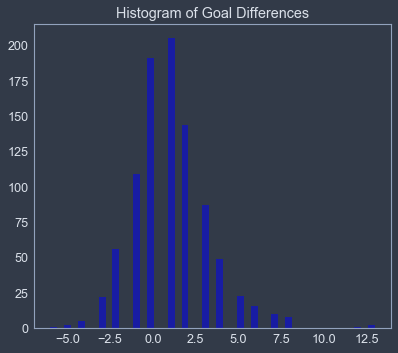

In [56]:
##Graphs
#Histogram
import matplotlib.pyplot as plt

plt.hist(df_ger['goaldiff'], bins='auto', facecolor='blue', alpha=0.5)
plt.title('Histogram of Goal Differences')

plt.show()

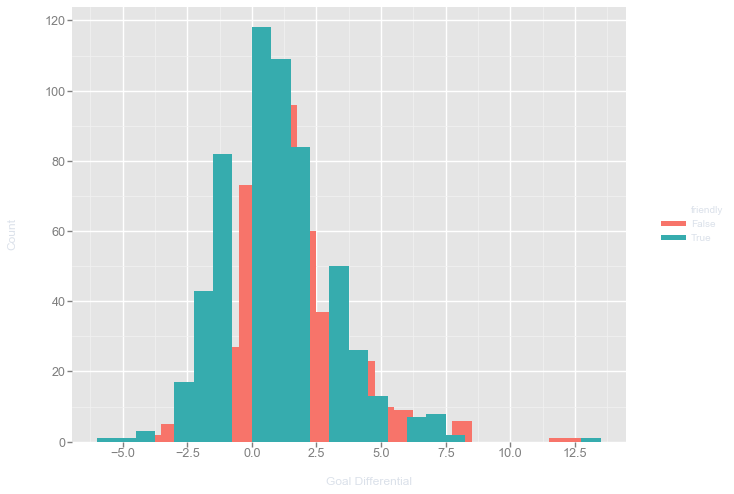

<ggplot: (122793656566)>

In [57]:
##Graphs
#Someone attempted to replicate ggplot2 for python! (kindof works)
!pip install ggplot
from ggplot import *

ggplot(df_ger, aes('goaldiff', fill='friendly')) +\
    geom_histogram(binwidth=.75, position="dodge") +\
    ylab("Count") + xlab("Goal Differential")

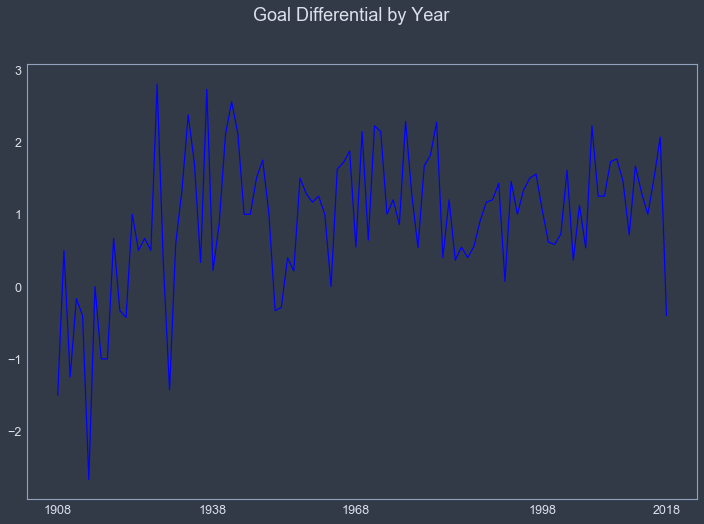

In [58]:
##Graphs
#Line chart

plt.figure(figsize=(12,8))

df_goaldiff_byyear = pd.pivot_table(df_ger, values='goaldiff', index=['year'], aggfunc='mean').reset_index()

plt.plot(df_goaldiff_byyear['year'], df_goaldiff_byyear['goaldiff'], color='blue')

plt.xticks([1908, 1938, 1968, 1998, 2018], \
           [1908, 1938, 1968, 1998, 2018])
plt.suptitle('Goal Differential by Year', fontsize=18)

plt.show()

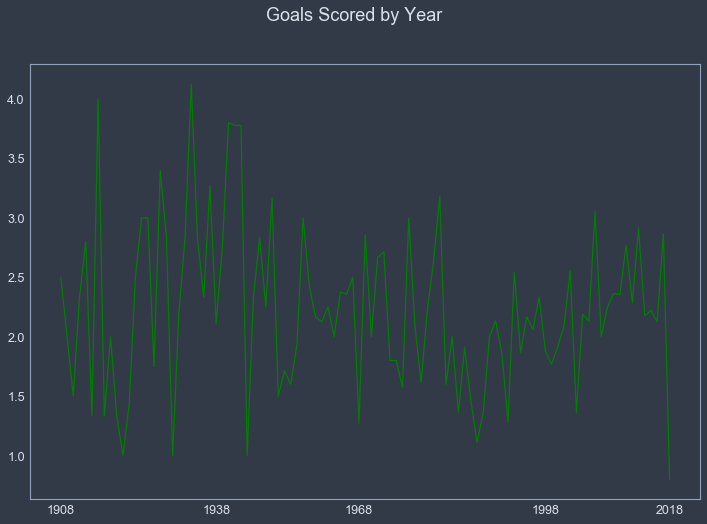

In [59]:
##Graphs
#Line chart
plt.figure(figsize=(12,8))

df_goals_byyear = pd.pivot_table(df_ger, values='goals', index=['year'], aggfunc='mean').reset_index()

plt.plot(df_goals_byyear['year'], df_goals_byyear['goals'], color='green')

plt.xticks([1908, 1938, 1968, 1998, 2018], \
           [1908, 1938, 1968, 1998, 2018])
plt.suptitle('Goals Scored by Year', fontsize=18)

plt.show()

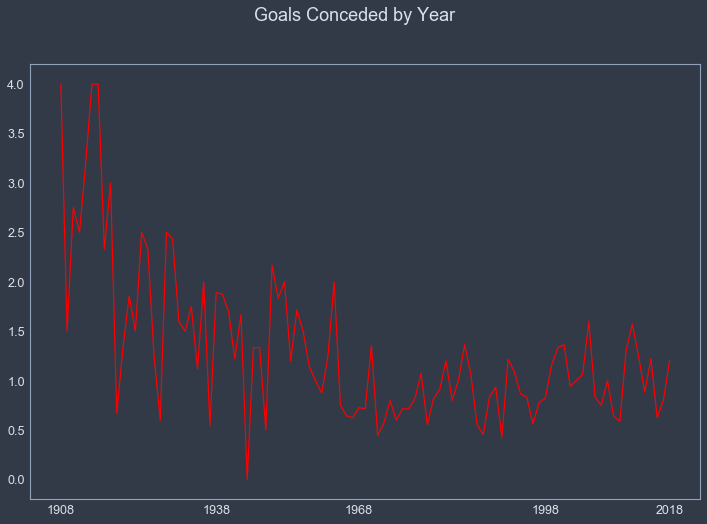

In [60]:
##Graphs
#Line chart
plt.figure(figsize=(12,8))

df_conceded_byyear = pd.pivot_table(df_ger, values='conceded', index=['year'], aggfunc='mean').reset_index()

plt.plot(df_conceded_byyear['year'], df_conceded_byyear['conceded'], color='red')

plt.xticks([1908, 1938, 1968, 1998, 2018], \
           [1908, 1938, 1968, 1998, 2018])
plt.suptitle('Goals Conceded by Year', fontsize=18)

plt.show()

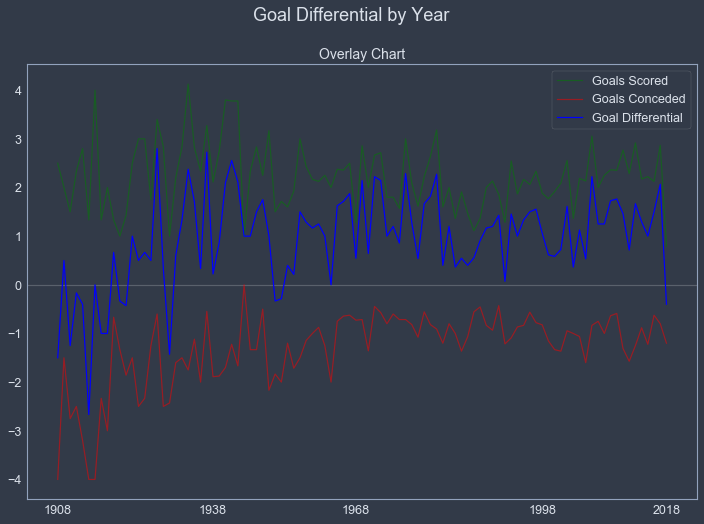

In [62]:
##Graphs
#Line chart
import matplotlib.ticker as ticker
plt.figure(figsize=(12,8))

df_conceded_byyear['conceded_neg'] = df_conceded_byyear['conceded']*-1

plt.axhline(0, color='white', alpha=0.2)
goals = plt.plot(df_goals_byyear['year'], df_goals_byyear['goals'], color='green', alpha=0.5, label = 'Goals Scored') 
conceded = plt.plot(df_conceded_byyear['year'], df_conceded_byyear['conceded_neg'], color='red', alpha=0.5, label = 'Goals Conceded')
goaldiff = plt.plot(df_goaldiff_byyear['year'], df_goaldiff_byyear['goaldiff'], color='blue', label = 'Goal Differential')

plt.xticks([1908, 1938, 1968, 1998, 2018], \
           [1908, 1938, 1968, 1998, 2018])
plt.suptitle('Goal Differential by Year', fontsize=18)
plt.title('Overlay Chart', fontsize=14)
plt.legend()

plt.show()